# **Getting Started with Statitics:**

- Statistics is the discpline that conerns the collection, organization , analyis, interpretation and presentation of data. The goal is for better decision making.

https://www.statisticshowto.com/probability-and-statistics/

## **Population vs Sample mean.**

Pop mean is calculated based on the entire population while sample mean is calculated based on the sample. The sample mean is less than the pop mean but tends to increase towards the pop mean with increase in sample size.

- Descriptive Statistics entails: analysing data, summarising data in the form of numbers and graphs. This entails using of barplots, histogeams, PDF. CDF. Measure of central tendency (Mean. Mode and Median). Measure of variance: std & variance.
- Inferential stats: Taking a sample from a population and infering - develop inference and conclusion for that specific population. Confidence Intervals: Examples: Z test, T test, Chi Square test.

## **Measures of Central Tendency:**
- Mean: Sum of variables/n
- Median - Useful when having outliers in the dataset.
- Mode: Frequent ocuurences;

This can be useful when doing feature engineering.Handling missing values

In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [2]:
#Getting General Stats
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [3]:
df.total_bill.mean()

np.float64(19.78594262295082)

In [4]:
df.total_bill.mode()

0    13.42
Name: total_bill, dtype: float64

In [5]:
df.total_bill.quantile(0.25)

np.float64(13.3475)

In [6]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Standard Deviation and Mean Absolute Deviation

How distributed/spread out the data points are in-respect to the average. 
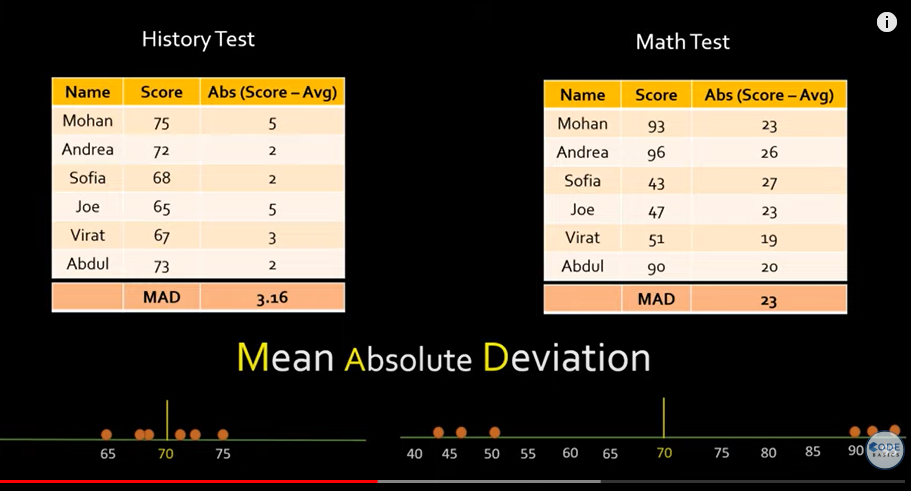

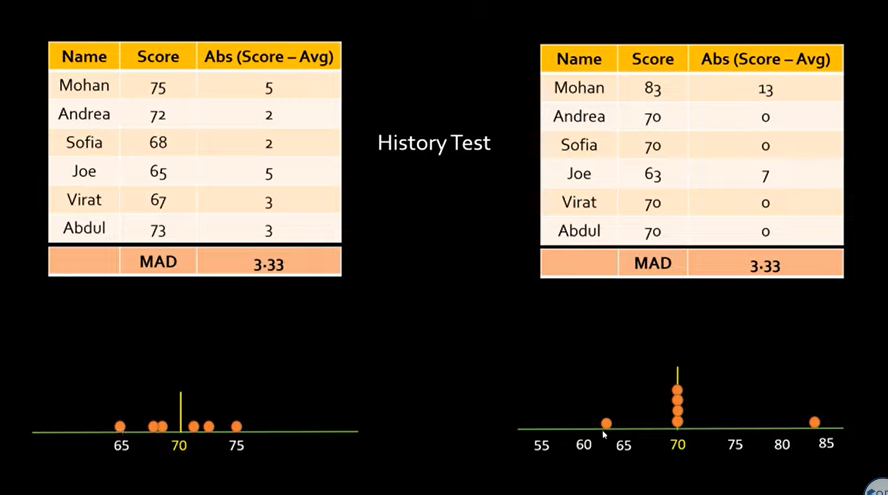

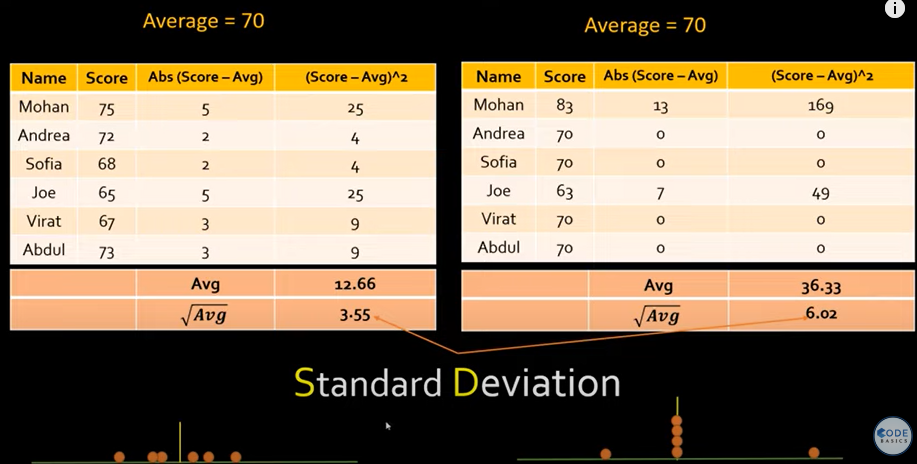

The Measure of Dispersion: Computing the distance of the data to its mean. 
- Mean Abosilute Deviation - L1
- Standard Deviation - L2

## **Gaussian Distribution/Normal Distribution**

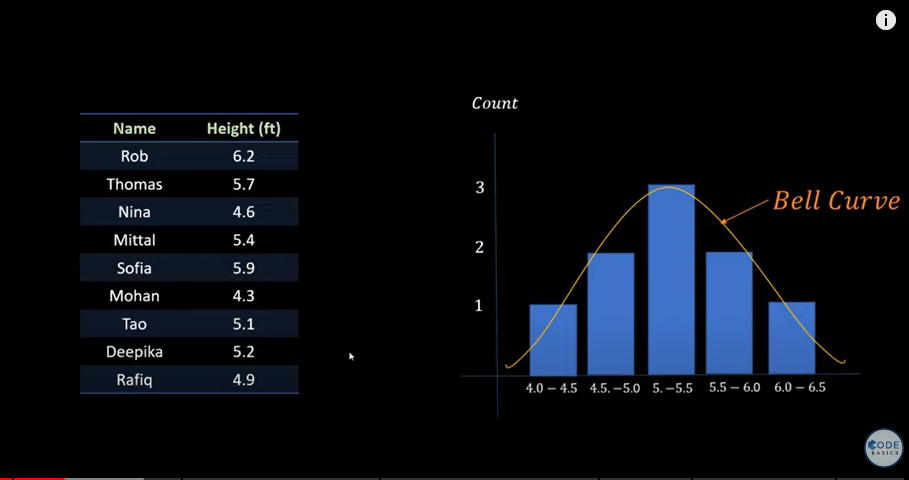
Some of the key terms in normal distribution are:
- Mean: [summation of x]n
- Variance summation([x- u]^2)/n
- std: Squaroot of variance
- std and variance helps to understand from the mean, how far is the next element located?
- This follows a bell curve.
- The emperical formula in gaussian distribution. 1 std ~ 68.3% , +-2std ~ 95.5%, +-3std ~ 99.7%.

Normal Dist. and Standard Deviation are useful for outlier removal. - General guideline: data points beyond 3std can be treated as outliers. 
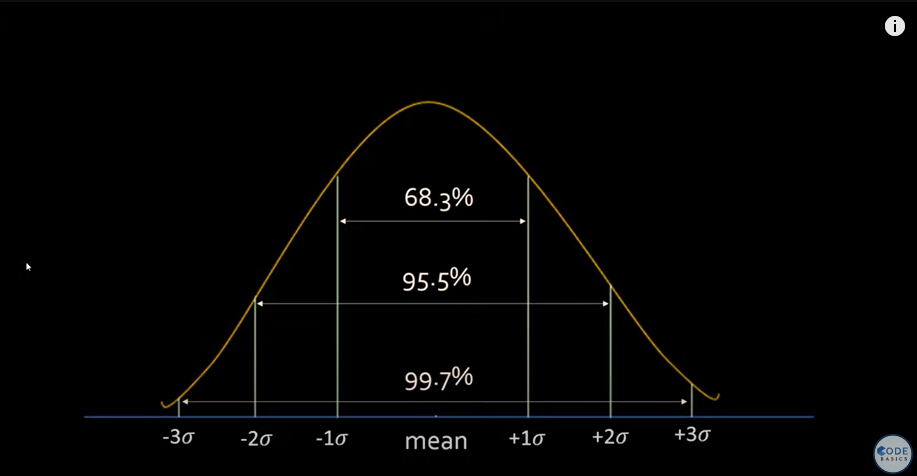

**Practical Implementation**

In [7]:
df = pd.read_csv('data\heights.csv')
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [9]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

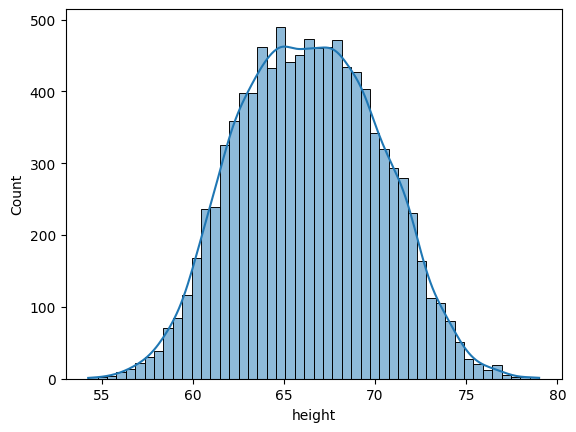

In [10]:
#Plotting Histogram
sns.histplot(df.height,kde=True)

In [11]:
mean = df.height.mean()
mean

np.float64(66.367559754866)

In [12]:
std = df.height.std()
std

np.float64(3.847528120795573)

In [13]:
#Getting the edges
mean - 3*std, mean + 3*std

(np.float64(54.824975392479274), np.float64(77.91014411725271))

In [20]:
df_no_outlier = df[(df.height > 54.83) & (df.height < 77.91)]

In [21]:
df_no_outlier.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

## Z Score

This is the number of standard deviations from the mean.
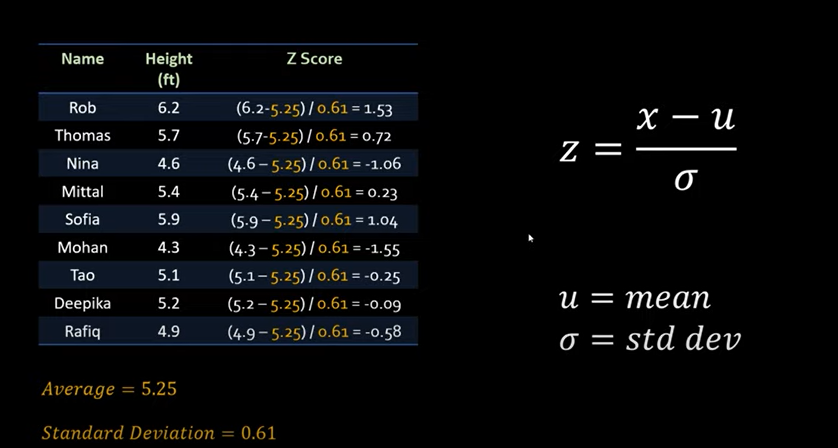

In [22]:
df['zscore'] = ((df.height - df.height.mean())/df.height.std())

In [23]:
df['zscore'] 

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: zscore, Length: 10000, dtype: float64

In [24]:
#removing Outliers using Zscore
df[df.zscore > 3]

gender     height    zscore
994    Male  78.095867  3.048271
1317   Male  78.462053  3.143445
2014   Male  78.998742  3.282934
3285   Male  78.528210  3.160640
3757   Male  78.621374  3.184854

In [26]:
df[(df.zscore >-3)&(df.zscore < 3)]

gender     height    zscore
0       Male  73.847017  1.943964
1       Male  68.781904  0.627505
2       Male  74.110105  2.012343
3       Male  71.730978  1.393991
4       Male  69.881796  0.913375
...      ...        ...       ...
9995  Female  66.172652 -0.050658
9996  Female  67.067155  0.181830
9997  Female  63.867992 -0.649655
9998  Female  69.034243  0.693090
9999  Female  61.944246 -1.149651

[9993 rows x 3 columns]

### Modified Z Score

Mean can be affected by outliers compared to Median which is not. Hence when using Median Absolted Deviation compared to Standard Deviation can capture the outliers. 
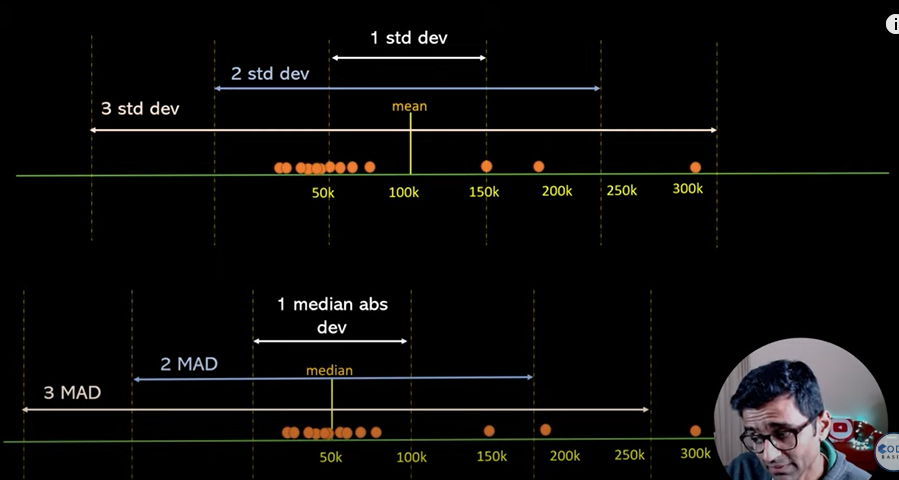
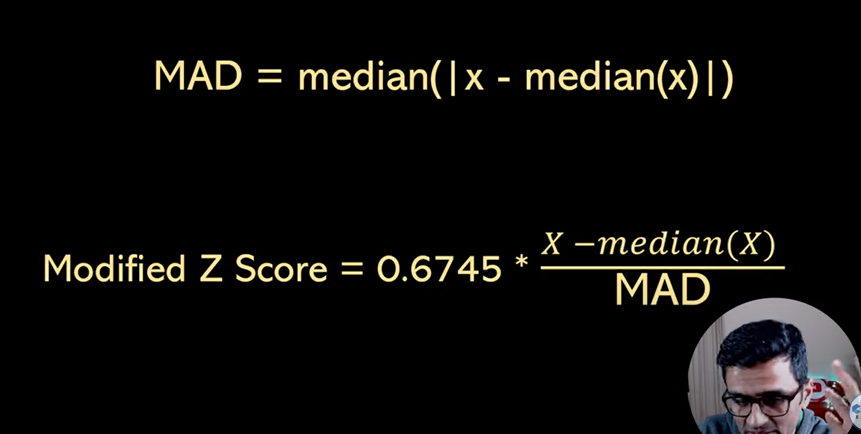

Threshold for Modified ZScore: If Modified ZScore > 3.5 Then Outlier

**Practical Implementation**

In [36]:
df = pd.read_csv("data\movie_revenues.csv")
df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   
3    1000000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4  100000000  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   
3                             NaN  26791   
4                             NaN    644   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   
3                                                 []                en   
4  [{"id": 310, "name": "artificial intelligence"...                en   

                 original_title  \
0                        Avatar   
1            You, Me and Dupree   
2          The Tailor of Panama   
3                  Brigham City   
4  A.I. Artificial Intelligence   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  After standing in as best man for his longtime...   18.600367   
2  A British spy is banished to Panama after havi...    7.047975   
3  Wes Clayton is a lawman and a bishop in a Morm...    0.280083   
4  A robotic boy, the first programmed to love, D...   34.035114   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Universal Pictures", "id": 33}, {"n...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Main Street Movie Company", "id": 6...   
4  [{"name": "DreamWorks SKG", "id": 27}, {"name"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   12/10/2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...    7/14/2006   130431368   
2  [{"iso_3166_1": "IE", "name": "Ireland"}, {"is...    2/11/2001    28008462   
3  [{"iso_3166_1": "US", "name": "United States o...    3/30/2001      852206   
4  [{"iso_3166_1": "US", "name": "United States o...    6/29/2001   235926552   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1      108           [{"iso_639_1": "en", "name": "English"}]  Released   
2      109  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
3      119           [{"iso_639_1": "en", "name": "English"}]  Released   
4      146           [{"iso_639_1": "en", "name": "English"}]  Released   

                                             tagline  \
0                        Enter the World of Pandora.   
1                   Two's company. Dupree's a crowd.   
2  In a place this treacherous, what a good spy n...   
3                                                NaN   
4  David is 11 years old. He weighs 60 pounds. He...   

                          title  vote_average  vote_count  
0                        Avatar           7.2       11800  
1            You, Me and Dupree           5.4         407  
2          The Tailor of Panama           6.2          92  
3                  Brigham City           7.3           4  
4  A.I. Artificial Intelligence           6.8        1974

In [37]:
df['revenue_mln'] = df['revenue'].apply(lambda x: x/1000000)
df.revenue_mln.describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [38]:
_, mean, std, *_ = df.revenue_mln.describe()

In [39]:
print(mean, std)

187.92889841304347 455.1144234195408


**Outlier detection using Z score**

In [40]:
def get_z_score(value, mean, std):
    return (value - mean)/std

In [41]:
df['z_score'] = df.revenue_mln.apply(lambda x: get_z_score(x, mean, std))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   130431368     108           [{"iso_639_1": "en", "name": "English"}]   
2    28008462     109  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                                            tagline  \
0  Released                        Enter the World of Pandora.   
1  Released                   Two's company. Dupree's a crowd.   
2  Released  In a place this treacherous, what a good spy n...   

                  title vote_average vote_count  revenue_mln   z_score  
0                Avatar          7.2      11800  2787.965087  5.712929  
1    You, Me and Dupree          5.4        407   130.431368 -0.126336  
2  The Tailor of Panama          6.2         92    28.008462 -0.351385  

[3 rows x 22 columns]

In [42]:
df[df.z_score>3]

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                      tagline   title vote_average vote_count  \
0  Released  Enter the World of Pandora.  Avatar          7.2      11800   

   revenue_mln   z_score  
0  2787.965087  5.712929  

[1 rows x 22 columns]

**Outlier detection using modified Z score**

So we got only 1 outlier using simple Z score. Based on the kind of analysis we are doing sometimes it might be better to use modified Z score as it will return more outliers.

In [45]:
import numpy as np
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [47]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
print(MAD, median)

56.399542499999995 83.8171415


**General guideline for modified Z score is to use 3.5 as a thresold. i.e. anything that has a mod z score of 3.5 or more is an outlier**

In [48]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [49]:
get_modified_z_score(2711, median, MAD)

np.float64(31.41931227648256)

In [50]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ... runtime  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...     162   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...     108   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...     109   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                                             tagline                 title  \
0                        Enter the World of Pandora.                Avatar   
1                   Two's company. Dupree's a crowd.    You, Me and Dupree   
2  In a place this treacherous, what a good spy n...  The Tailor of Panama   

  vote_average vote_count  revenue_mln   z_score  mod_z_score  
0          7.2      11800  2787.965087  5.712929    32.339762  
1          5.4        407   130.431368 -0.126336     0.557474  
2          6.2         92    28.008462 -0.351385    -0.667434  

[3 rows x 23 columns]

In [51]:
df[df.mod_z_score>3.5]

budget                                             genres  \
0   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
7   150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
12   25000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   

                         homepage      id  \
0     http://www.avatarmovie.com/   19995   
7   http://www.jurassicworld.com/  135397   
12                            NaN     619   

                                             keywords original_language  \
0   [{"id": 1463, "name": "culture clash"}, {"id":...                en   
7   [{"id": 1299, "name": "monster"}, {"id": 1718,...                en   
12  [{"id": 1156, "name": "sister sister relations...                en   

    original_title                                           overview  \
0           Avatar  In the 22nd century, a paraplegic Marine is di...   
7   Jurassic World  Twenty-two years after the events of Jurassic ...   
12   The Bodyguard  A former Secret Service agent grudgingly takes...   

    popularity                               production_companies  ...  \
0   150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
7   418.708552  [{"name": "Universal Studios", "id": 13}, {"na...  ...   
12   26.576385  [{"name": "Tig Productions", "id": 335}, {"nam...  ...   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
7      124           [{"iso_639_1": "en", "name": "English"}]  Released   
12     129           [{"iso_639_1": "en", "name": "English"}]  Released   

                                              tagline           title  \
0                         Enter the World of Pandora.          Avatar   
7                                   The park is open.  Jurassic World   
12  Never let her out of your sight. Never let you...   The Bodyguard   

   vote_average vote_count  revenue_mln   z_score  mod_z_score  
0           7.2      11800  2787.965087  5.712929    32.339762  
7           6.5       8662  1513.528810  2.912674    17.098375  
12          6.1        661   411.006740  0.490158     3.912964  

[3 rows x 23 columns]

## **Log Normal Distribution**


**Using Log**

In [28]:
df = pd.read_csv('data\\revenue.csv')
df.head()

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel      4.7
4      Axis Bank      5.6

<Axes: xlabel='company'>

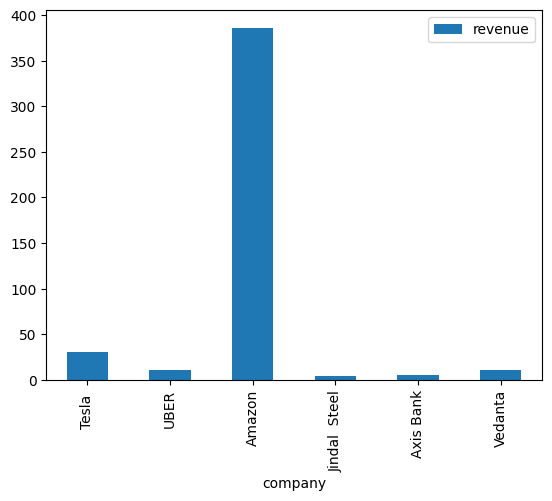

In [29]:
#Using a normal bar chart
df.plot(x='company',y='revenue',kind='bar')

From above we can observe that it is harder to compare the revenue of the other companies due to Amazon's high revenue. Here can use log to do a comparison

<Axes: xlabel='company'>

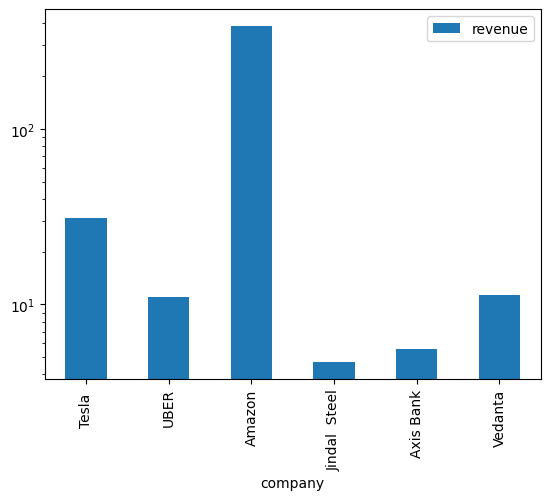

In [30]:
df.plot(x='company',y='revenue',kind='bar',logy=True)

**Log Normal Distribution**
- if log(x) belongs to a log normal distribution.
- Log Normal distribution looks like a bell curve but the curve has a right skew. is longer on the right side
-
Types of distribution and their examples:
- Gaussian: - Height of people in a population.
- Log Normal - income of people in a population. (2), The length of comments on social media, product reviews. (4): Hospitilization Days, Advertising Budget
- Converting from log normal to standard normal distribution: Log Normalization - Using Log Transform

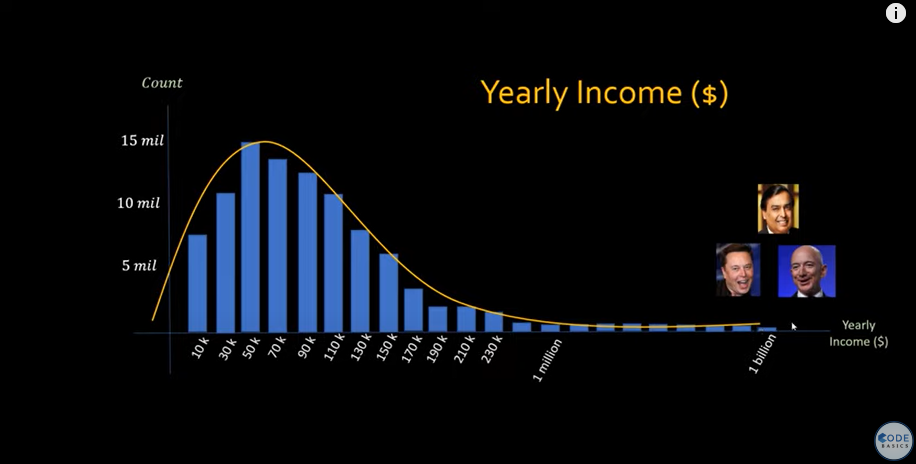
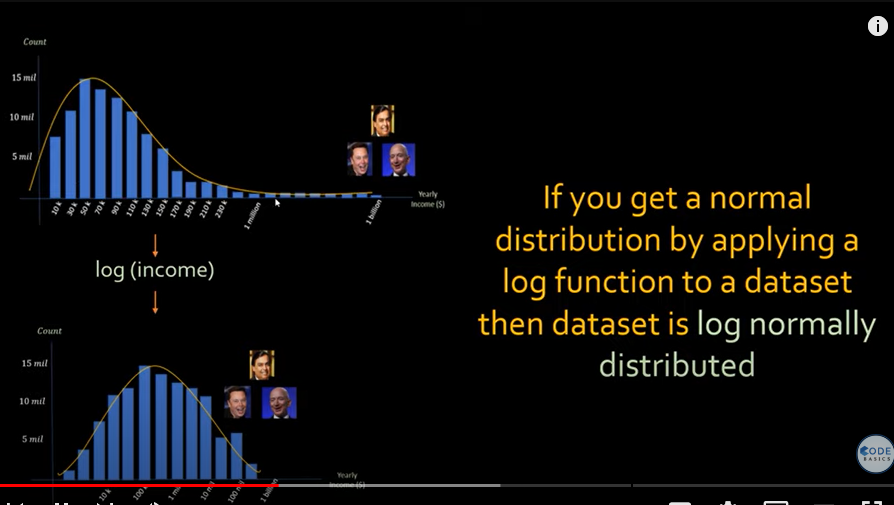

**Practical Implementation**

In [32]:
df = pd.read_csv(
    "data\income.csv", 
    index_col=None, 
    names=["income","count"], 
    skiprows=1
)
df.head()

income  count
0    5000   4371
1   10000   3295
2   15000   5825
3   20000   6047
4   25000   6097

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14316\265013805.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),


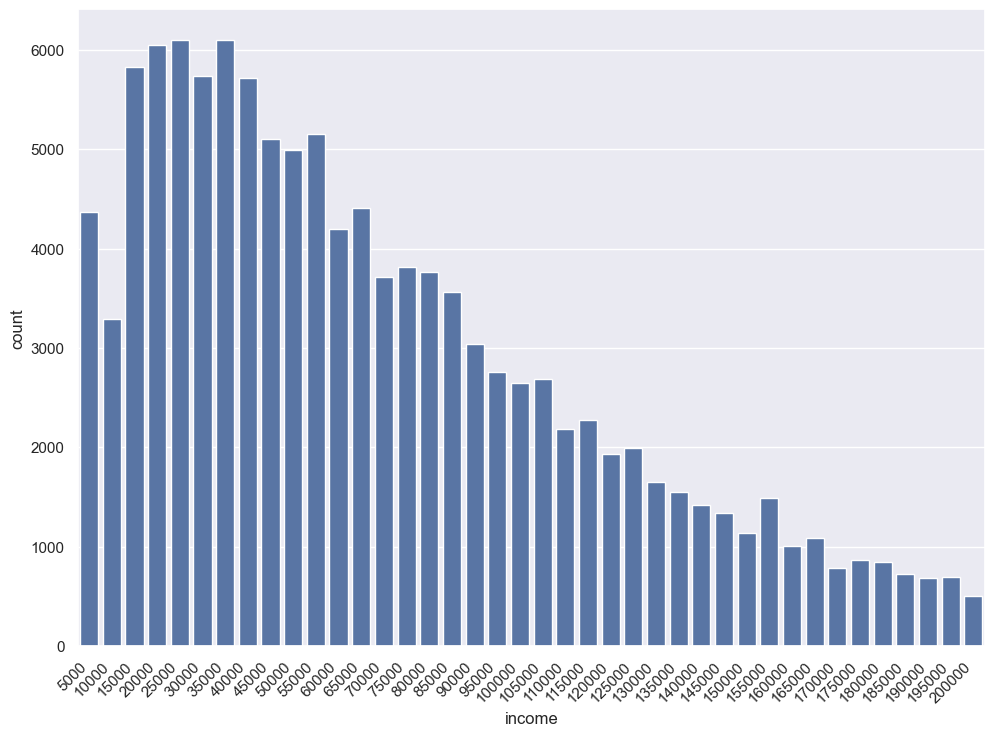

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14316\3088764181.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),


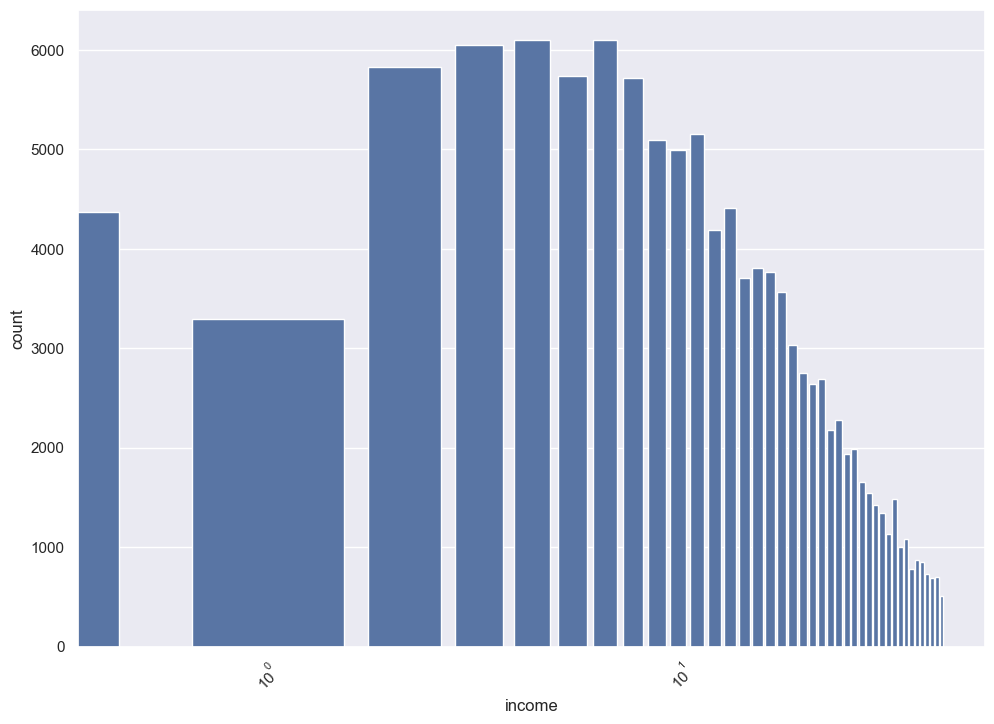

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');
g.set(xscale="log");

## Cosine Similarity

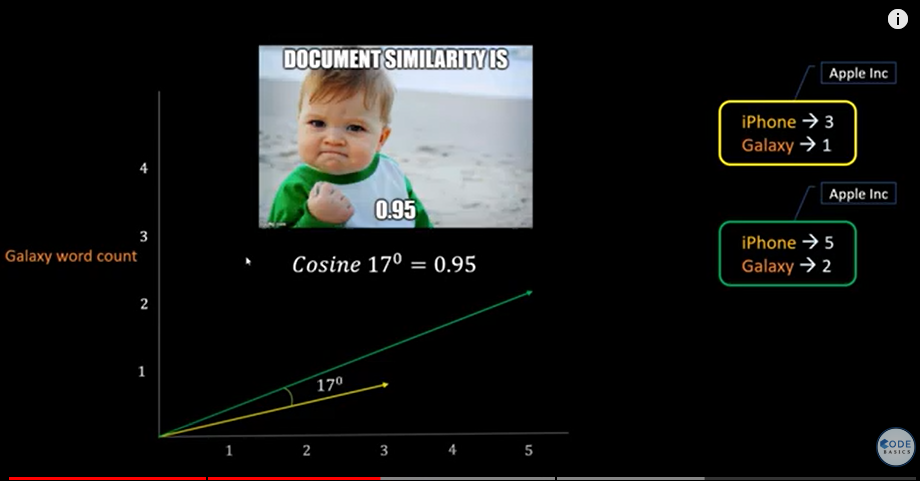

Cosine Distance = 1 - Cosine Similarity

## **Random Variables:**

- There are main 2 types: Categorical & numerical variables.

The following are the types of numerical vrariables:
- Discrete random variables: A whole numnber. e.g. How many doors does a Subaru XV have? Population of a country.
- Continious random variables: Within a range of values: e.g. height of a population,

**Covariance**

- This is important during data pre-processing.
- Helps to get the direction of relationship of vraiables.
- Example where Size and Price of the house. When the size of the house increases the price increases: This has a positive covariance.
- When X is increasing and y decreasing: negative cov.
- Covariance just gives the direction of relationship but doesn't quantify by how much: this can be achieved through pearson correlation coefficient.



**Central Limit Theorem**

- This specifies for a random variable, if you take n number of samples and get plot the mean of the samples, they follow a gaussian distribution. with the mean close to the random variable's mean.

**Chebyshev's Inequality**

- If the random variable does not follow gaussian distribution; use the probablity that the random variable falls within certain percentage. e.g. pr(u-k.std < x <x +k.std) > 1-(1/k^2)

**What is Pearson Correlation Coefficient? Difference between Correlation and Covariance**

- Pearson correlation coefficient: Cov(x,y)/(std x * std y): Getting the strength and direction of relationship between 2 variables.
- Covariance only measures the direction while pearson correlation measures both the strength and direction of relationship between 2 variables.

**Spearman's rank correlation coefficient**

- Spearman - entails finding the pearson correlation of the rank of the variables
- This is ideal for non-linear data.

## **Outliers**

- An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

**What are the criteria to identify an outlier?**

- Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
- Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

**What is the reason for an outlier to exists in a dataset?**
- Variability in the data
- An experimental measurement error

**What are the impacts of having outliers in a dataset?**
- It causes various problems during our statistical analysis
- It may cause a significant impact on the mean and the standard deviation

**Various ways of finding the outlier.**
- Using scatter plots
- Box plot
- using z score
- using the IQR interquantile range

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

**Detecting outlier using Z score**

Using Z score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [ ]:
outliers=[]
def detect_outliers(data):

    threshold=3
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
outlier_pt=detect_outliers(dataset)

In [ ]:
outlier_pt

[102, 107, 108]

**InterQuantile Range**

75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [ ]:
## Perform all the steps of IQR
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [ ]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [ ]:
print(quantile1,quantile3)

12.0 15.0


In [ ]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [ ]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

In [ ]:
print(lower_bound_val,upper_bound_val)

7.5 19.5


In [ ]:
#finding the outliers using the IQR method
outliers_iqr = []
for i in dataset:
  if i < lower_bound_val or i > upper_bound_val:
    outliers_iqr.append(i)

In [ ]:
outliers_iqr

[102, 107, 108]

## **Standardization Vs Normalization**

- The challenge is that in a given data, the independent features might have different units and magnitude; e.g. Measuruing age in years and height in cm ; therefore in ML application, it is useful to scale the features to have the same range.  Example using MinMax Scaler (X - Xmin)/(Xmax-Xmin)
- Normalization helps to scale the feature between 0 and 1.
- Standaradization helps you to scale your feature based on standard normal distribution. (mean of o and std of 1): Standard scaler
- Feature scaling is useful in algorithims that involve the gradient descent: linear, logistical, clustering, deep learnin
- MinMax scaler useful for CNN and ANN - e.g. image processing.

## **What Is P Value In Statistics**

- In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct
- P value: it is the probablity of the null hypothesis to be true.
- P value also called significance value. p=0.05


p-values: What they are and how to interpret them: [StatsQuest](https://www.youtube.com/watch?v=vemZtEM63GY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=12)

- Using the Drug A & Drug B example: p-values are numbers between 0 and 1, that quantify how confident we should be that Drug A is different from Drug B. The more close the p value is to 0, the more confident we are that Drug A and Drug B are different.

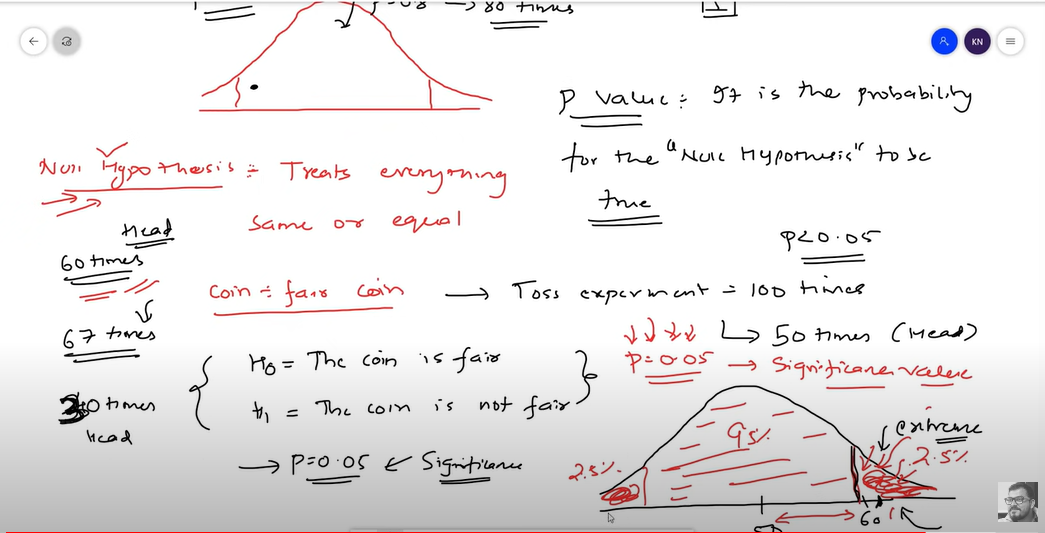

## **Hypothesis Testing**

**How To Perform Hypothesis Testing**

The following are the steps followed when performing hypothesis testing:
- Define the null(Ho): The established fact: e.g Drug A has been used since. The opposite of what we are trying to prove: Drug A is better. & alternate hypothesis(H1): - What are trying to prove e.g Drug B is better than Drug A. 
- Perform Experiments: [Z test, t test, chi square, or annova]
- Then depending on the test value, you either accept or reject the null hypothesis.
- Significance value = 0.05, then confidence interval is 95%.

**The following are types of statitical tests:**
- T test - comparison of mean, where the sample standard deviation is given.
- Z test - comparison of mean, where the population standard deviation is provided.
- Annova test - analysis of variance
- F test - Comparison of variance
- Chi square: compare categorical variables.


**Example Problem Statement: Z test 2 tail Test**

In a population the average IQ is 100 and std=15; The doctor tested a new medication to find out whether it increases or decreases the IQ. After 1 month, a sample of 30 participants were taken, the sample has a mean of 140. Did medication affect intelligence?

Steps:
- Null Hypothesis: Mean = 100, while H1 mean is NOT equal to 100.
- Based on the significance value of 0.05, calculate the Z test and see whether it falss within the 95% confidence interval.


**Example Problem Statement: One Sample Z test with propotion**

A survey claims that 9 out of 10 doctors recommend aspirin for their patients with headache. To test this claim a  random sample of 100 doctors is taken, out of the sample, 82 indicate they recommend aspirin. Is this claim accurate? use significance value of  = 0.05

Steps:
- Null Hypothesis: p=0.9, H1 p is NOT equal to 1.

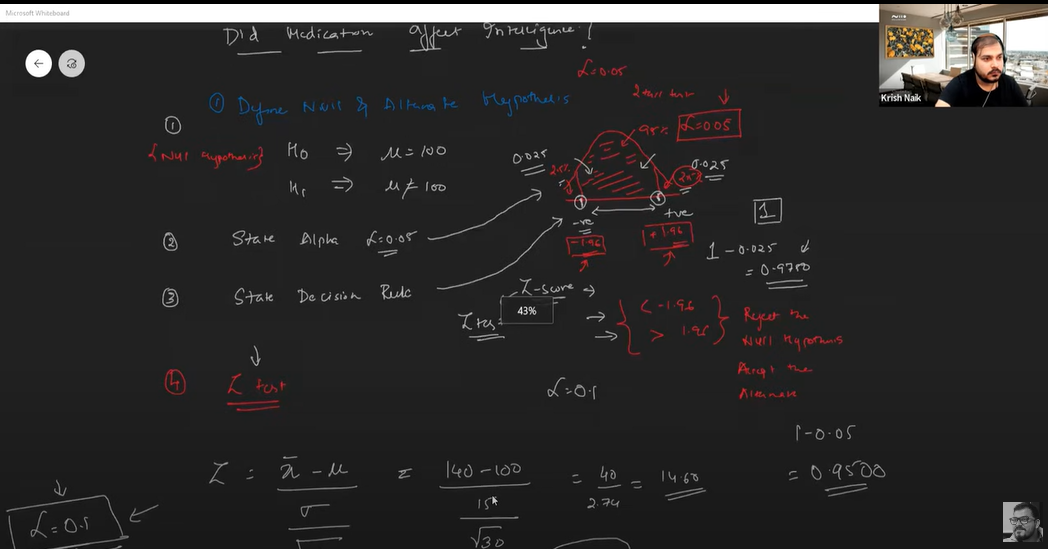

### **Confidence Intervals In Statistics**

**Confidence Intervals In Statistics**

- Point Estimate: In a situation where you want to calculate the mean of variable for a large pop, we can use sample mean according to central limit theorem, where the sample mean can be estimated to pop mean.
- Can utlize z test when the standard deviation of the pop is provided, if not provided use t-test.
- Confidence Interval(CI) = Sample mean +- margin error.
- Margin error is calculated with Z sore

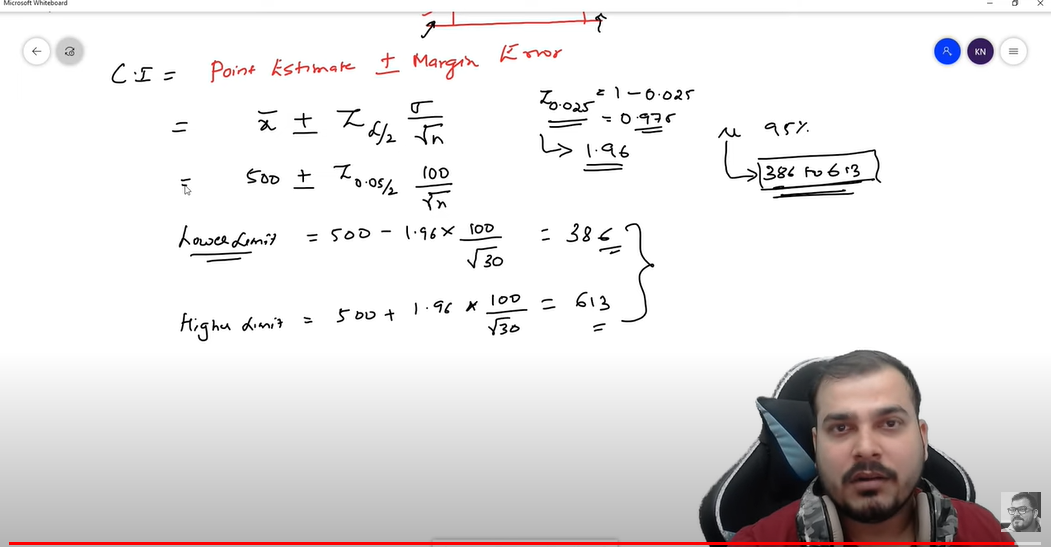

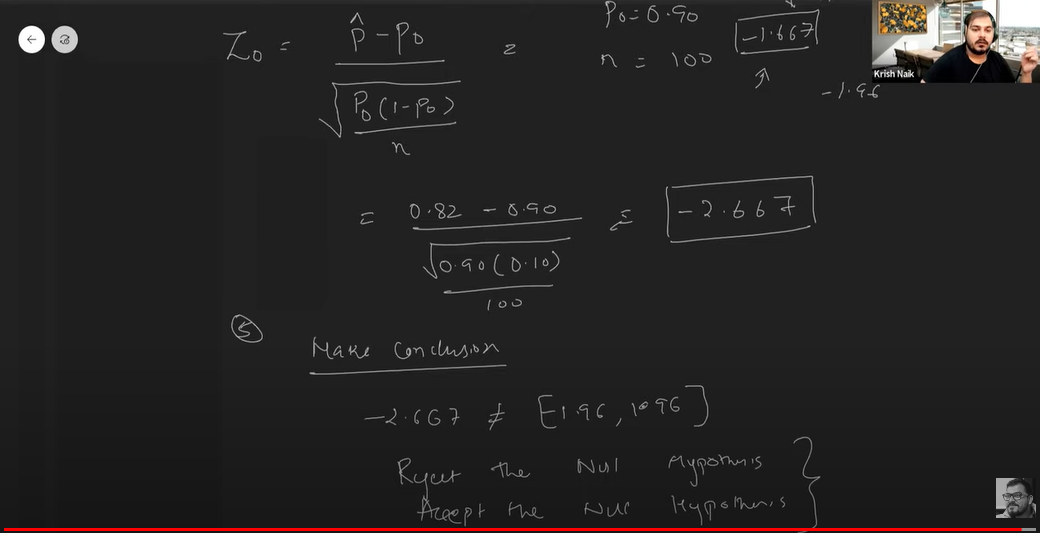

### **Skewness:**

**Right Skew**: Elongated on the right side: Examples; wealth distribution, lenth of comments: Mode < Median < Mean


**symmetrical/Normal Distribution**: Mean=Mode=Median: Right Hand == Left Hand: Examples weight, height of population.

**Negative/Left Skew** : Elongated on the left side: Mean < Median < Mode: Examples: Life Span



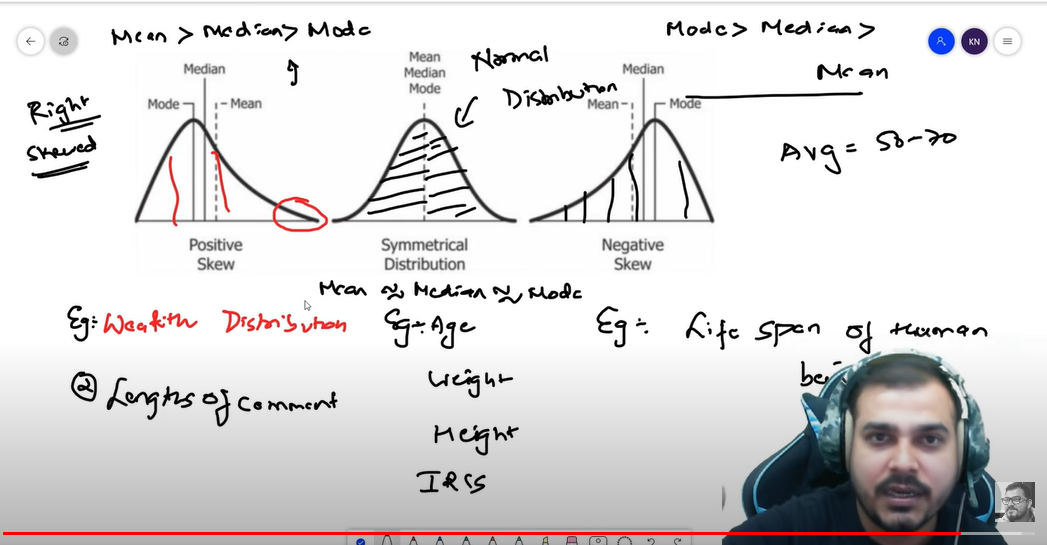![image.png](
)

### **Bernoulli distribution- Mean, Variance And Standard Deviation OF Bernoulli distribution**

- Only 2 outcomes
- The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution). It is also a special case of the two-point distribution, for which the possible outcomes need not be 0 and 1.
- Probablity Mass Function (Pmf) - discrete function.
- Probablity Density Function - outcome is continuous. e.g. normal distribution: PDF is a derviative of cdf
- P(success) = p while p(failure)=1-p=q
- The mean of bernoulli will always be equal to p

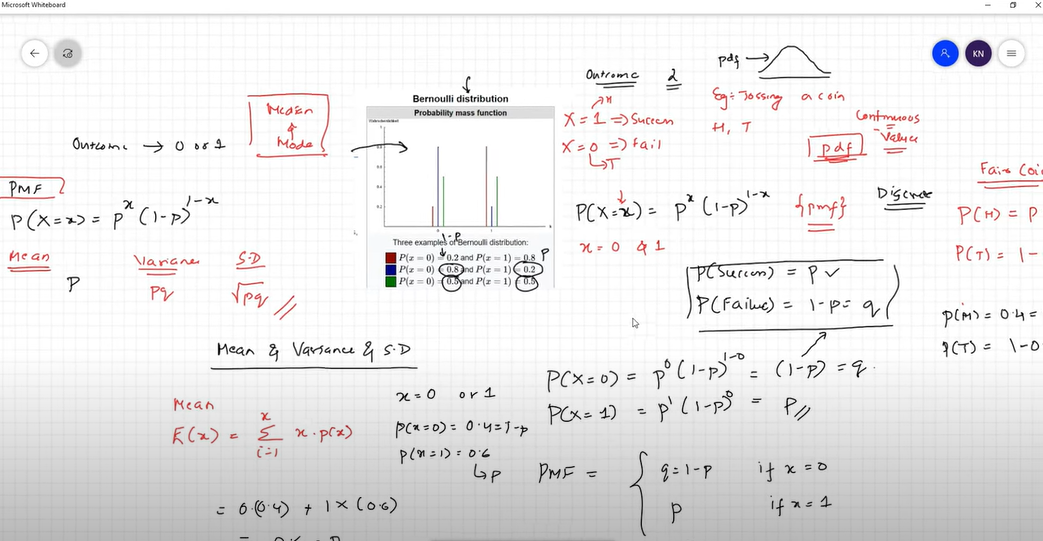

**5 Number Summary And How To handle Outliers Using IQR-Statistics**

The 5 number summary are:
- Minimim
- 25%
- Median
- 75%
- Maximum



### **Different Type Of Sampling Techniques With Examples**

- Random Sampling Technique: randmonly picking samples from the pop
- Stratified Sampling Technique: Picking samples to avoid bias.
- Systematic sampling:  - selecting the nth person.
- Cluster sampling: Dependent on the domain.  - selecting people who are experts in a certain domain.  

**Whether We Should Reduce False Positive Or Negative In Confusion Matrix**

Use cases to evaluate:

*   Whether the person has a disease or not? - False Negative should be reduced; reduces the chances where a diagnosis is missed.
*   Whether the market will crash or not?Goal is to prevent people losing money hence need to reduce false negative. Also reduce false positive to prevent investor from losing potential income when market grows.
- Whether the vaccination has a side effect ot not?  

Confusion Matrix:
- False Negative: type 2 error
- Fale Positive - type 1 error



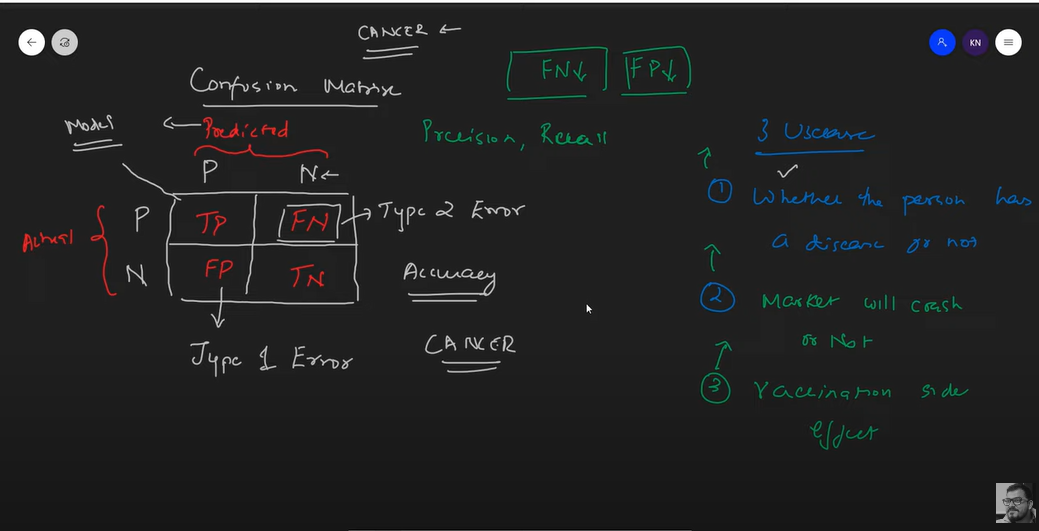

**Z Score And Its Applications**

- Z score helps to find out how far a value is from the mean.


Applications of Z Score:
- Standardization
- Comparing scores between different distribution


### **Power Law Distribution And Its Examples And Application**

- The power law (also called the scaling law) states that a relative change in one quantity results in a proportional relative change in another.A power law distribution has the form Y = k Xα, where: X and Y are variables of interest, α is the law's exponent, k is a constant.
- 80 - 20% Rule
- Example: 80% of sales are coming from 20% of overall products.

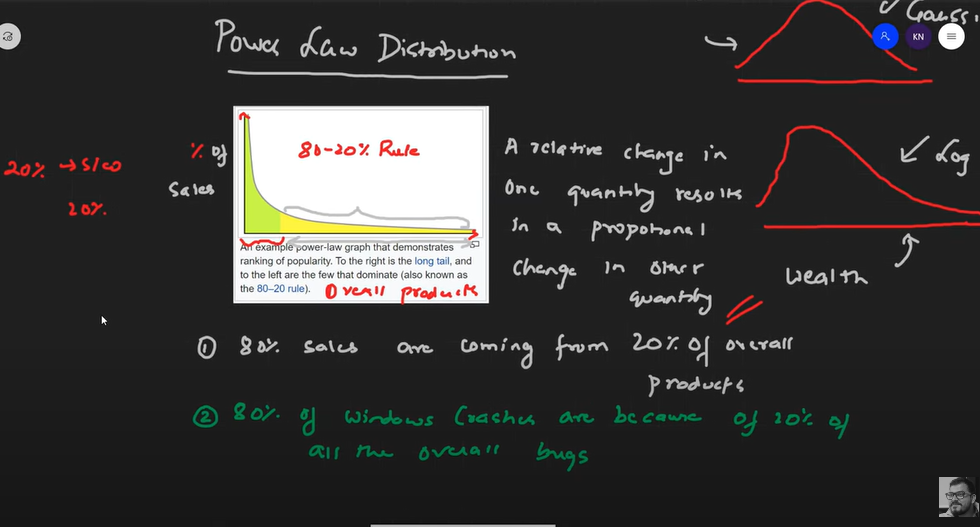